In [1]:
%reload_ext autoreload
%autoreload 2

import os
import scipy.io as sio
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import seaborn as sns 
project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import lick_behav_analysis as behav

In [4]:
fps = 15
# path = '/Users/savani/Downloads/2p_data/glp23_wd_30suc_L155P800_565um-107/glp23_wd_30suc_0_6000_250131-125059.mat'
path = '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fed_d3/GRC3_fed_sucrose_20250212_0_6000_250212-112522.mat'
# behaviordata = sio.loadmat(path)
# bout_start, bout_end, bout_start_frames, bout_end_frames = behav.og_lickprocessing(path)
paths = ['/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp4_fedNoCues_L180_P815_650um-_03052024-1355-066',
          '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp6_fedNoCues_L180P815_600um-03062024-1321-073',
            '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp10_fed_30suc_L170P800_560um_040924-025',
          '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp17_fed30suc_L150P800_565um_0613-020',
            '/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fed 30 sucrose/glp23_fed_30suc_L155P800_575um-20250203-112']

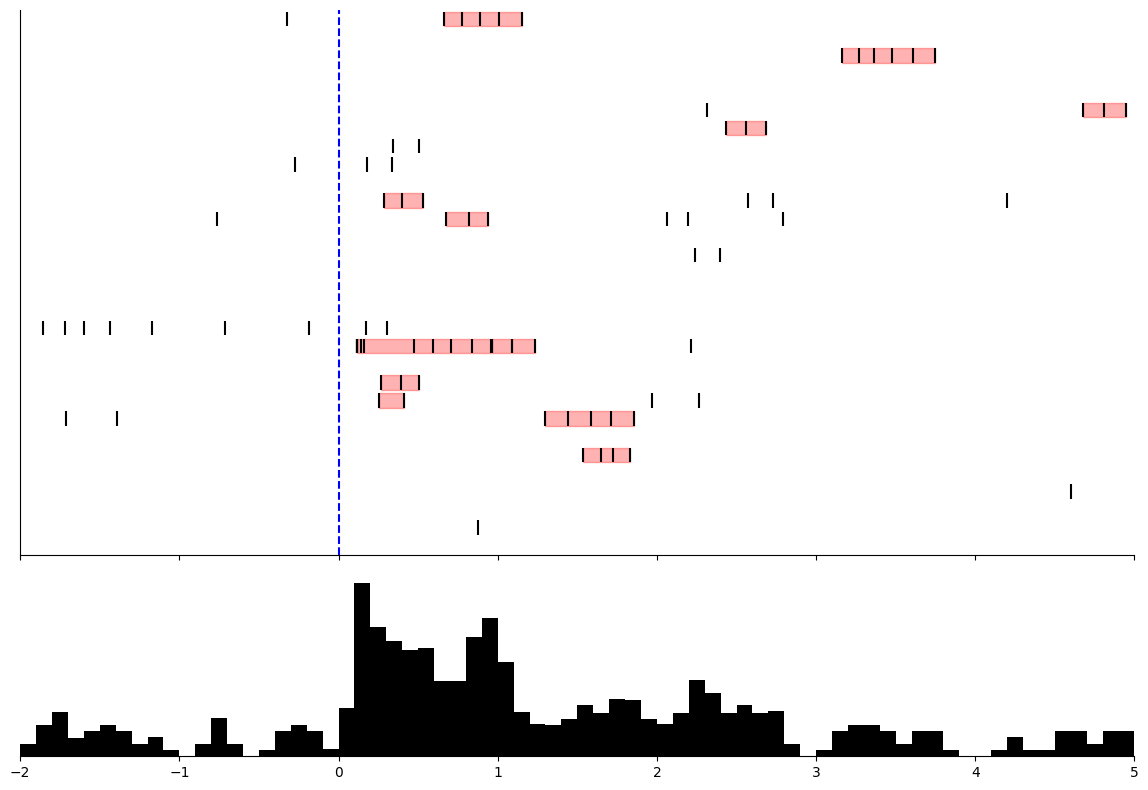

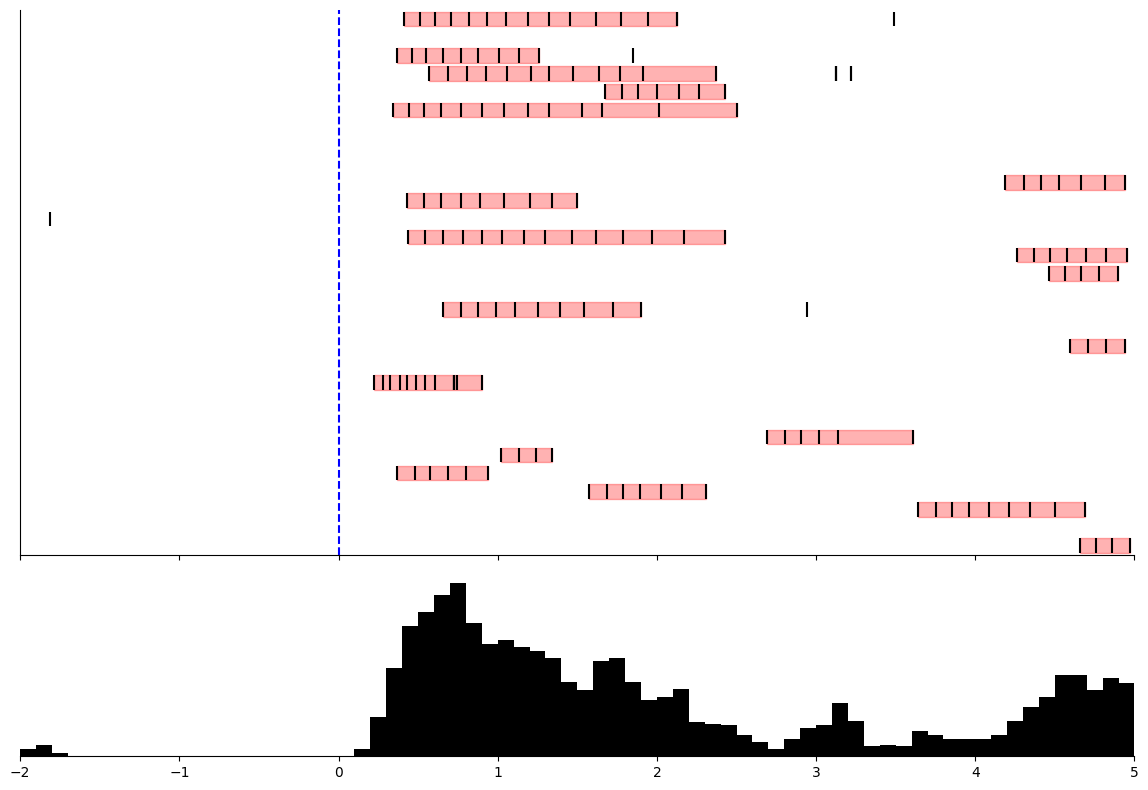

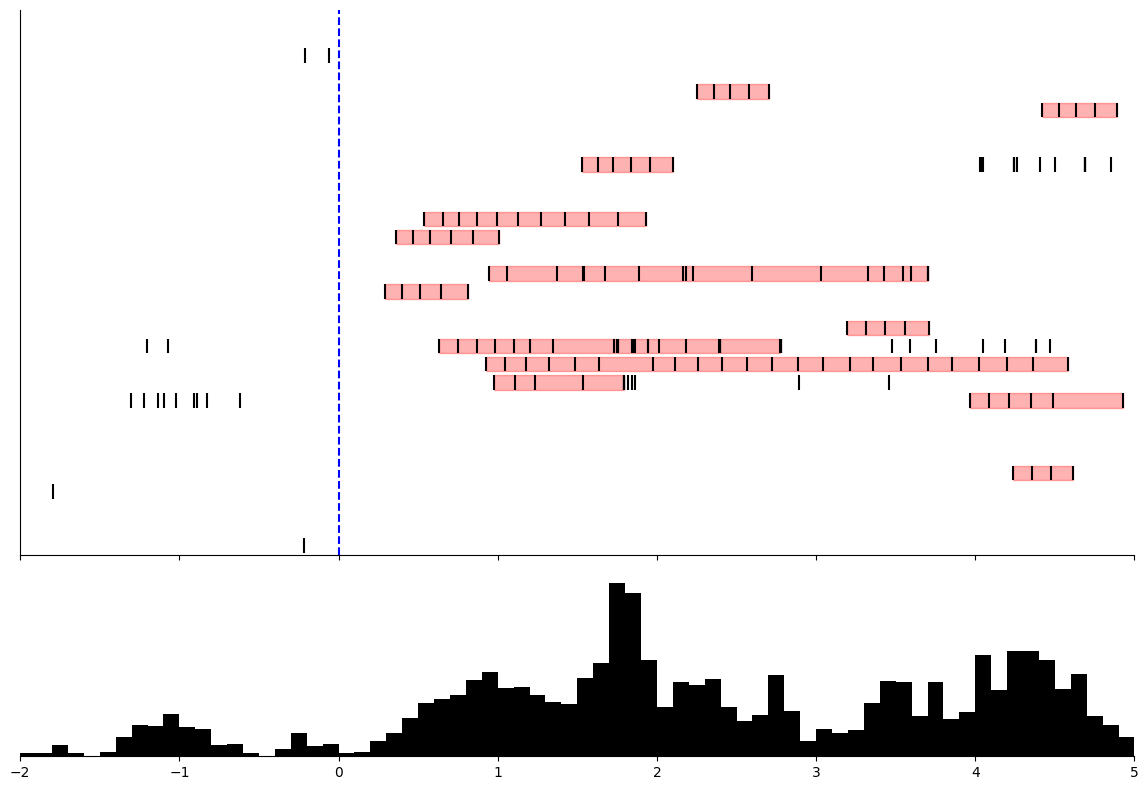

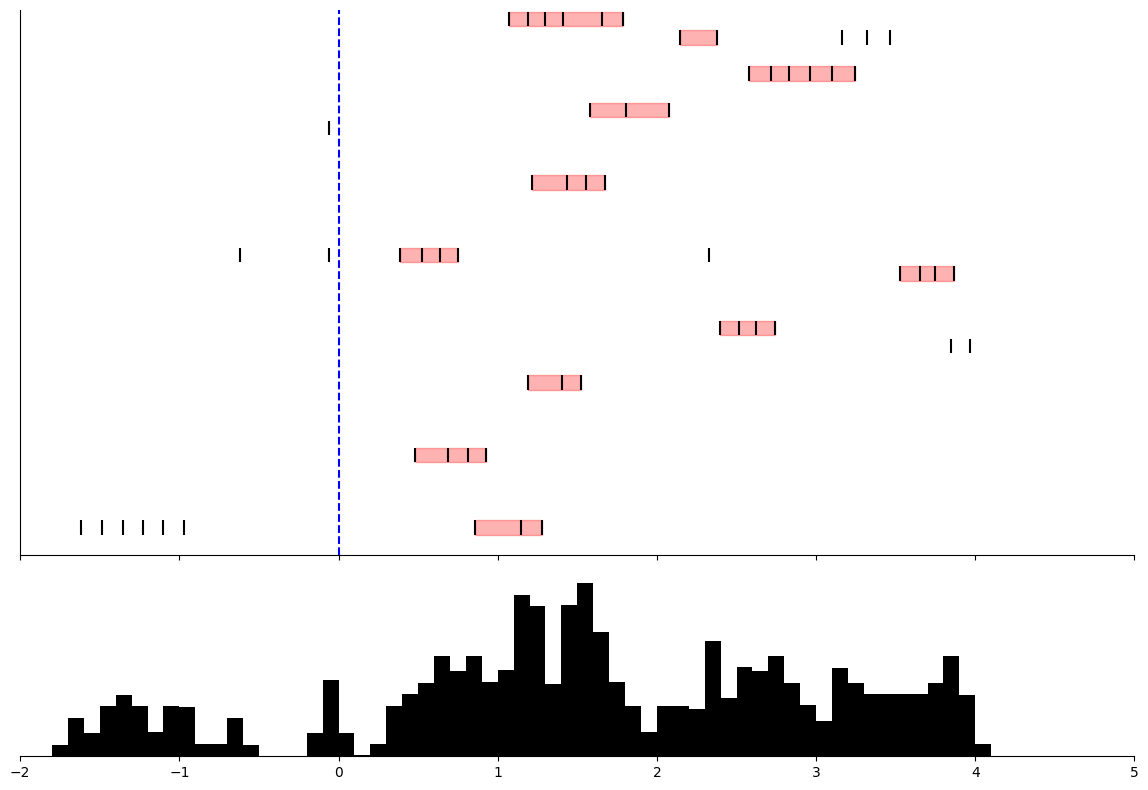

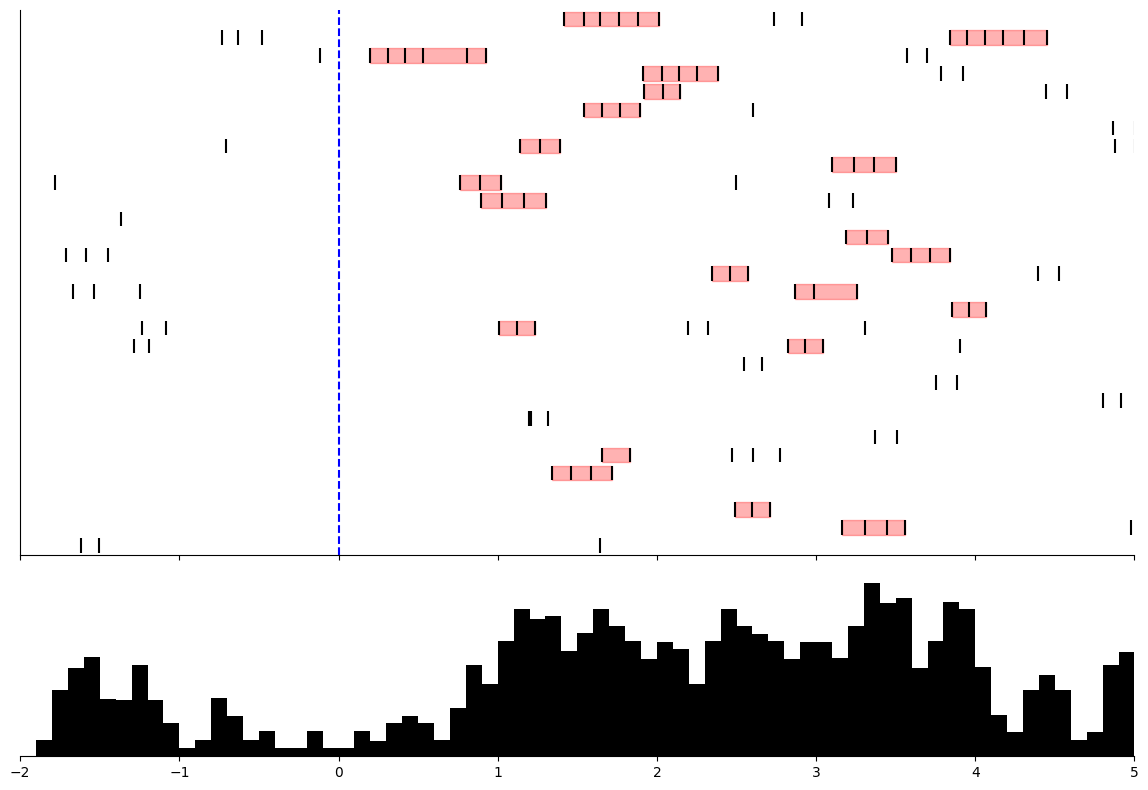

In [8]:
for path in [os.path.join(f, 'suite2p', 'plane0', 'behaviordata.mat') for f in paths]:
    fig, ax_raster, ax_psth = behav.plot_lick_raster_with_psth(
        mat_file = path,
        align_to = 'reward',
        pre_window = 5,
        post_window = 10,
        bin_size_psth = 0.1,
        smooth_psth = True,
        psth_smoothing_sigma = 0.65,
        xlabel = 'Time (s)',
        ylabel_raster = 'Trial #',
        ylabel_psth = 'Norm. Licks/sec',
        fps = 15,
        plot_bouts = True,
        multiple_tastant= False,
        filter_pre_licknum = 20,
        normalize_histo = True
    )
    ax_psth.set_xlim(left = -2, right = 5)
    ax_raster.set_ylabel("")
    ax_raster.set_yticks([])
    sns.despine(ax = ax_psth, left = True)
    ax_psth.set_yticks([])
    # plt.savefig('/Users/savani/Documents/PangLab/TwoPhotonAnalysis/figures/glp6_fasted_behavior.pdf')

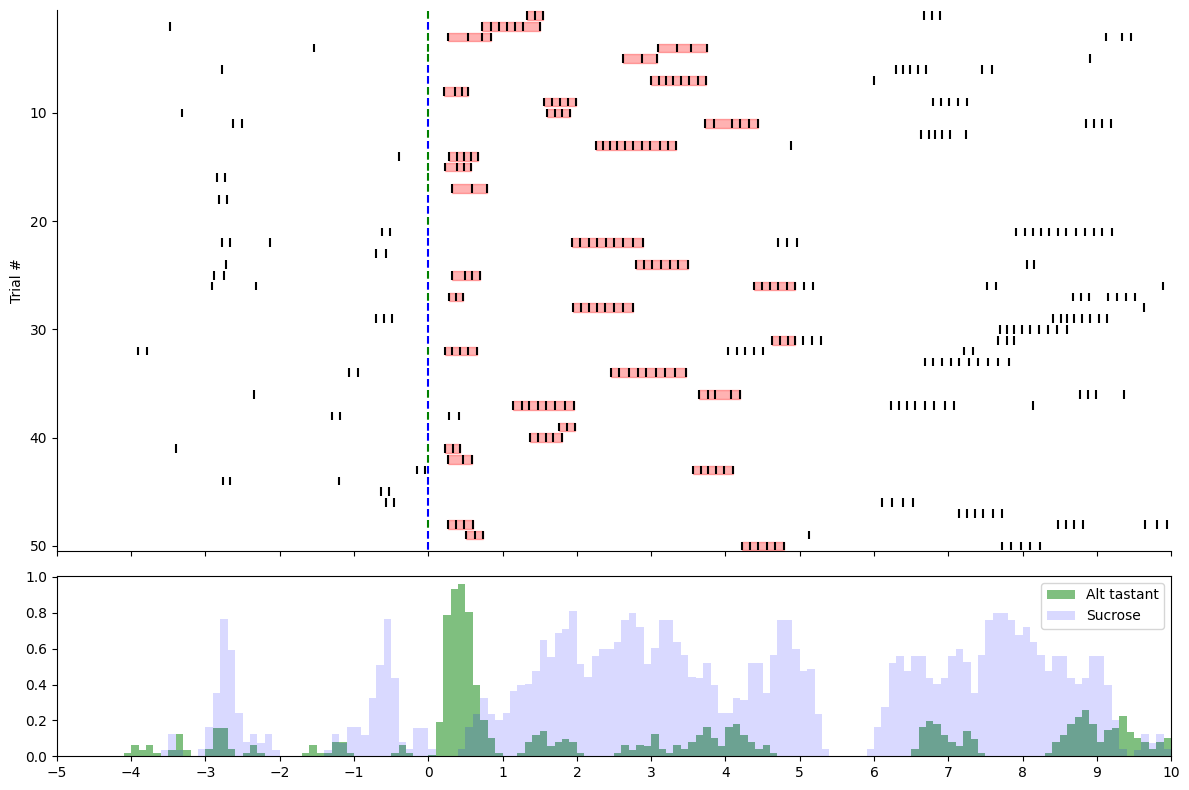

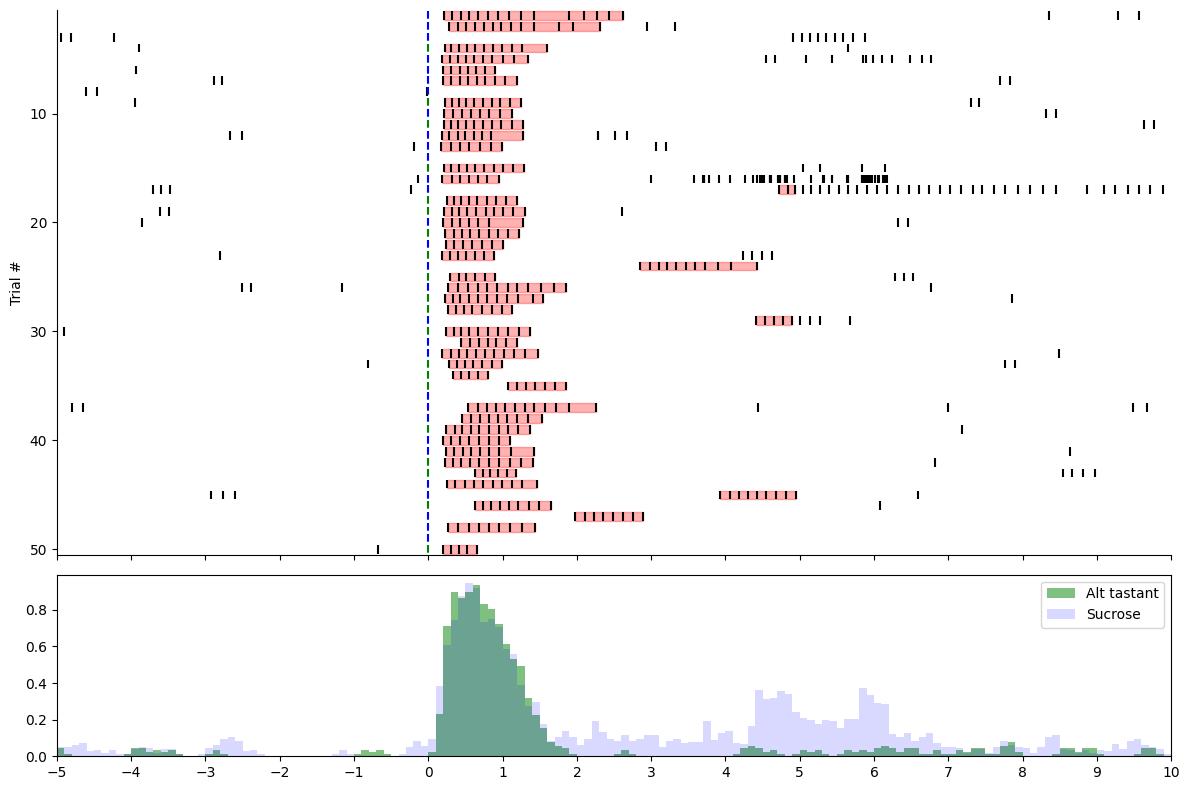

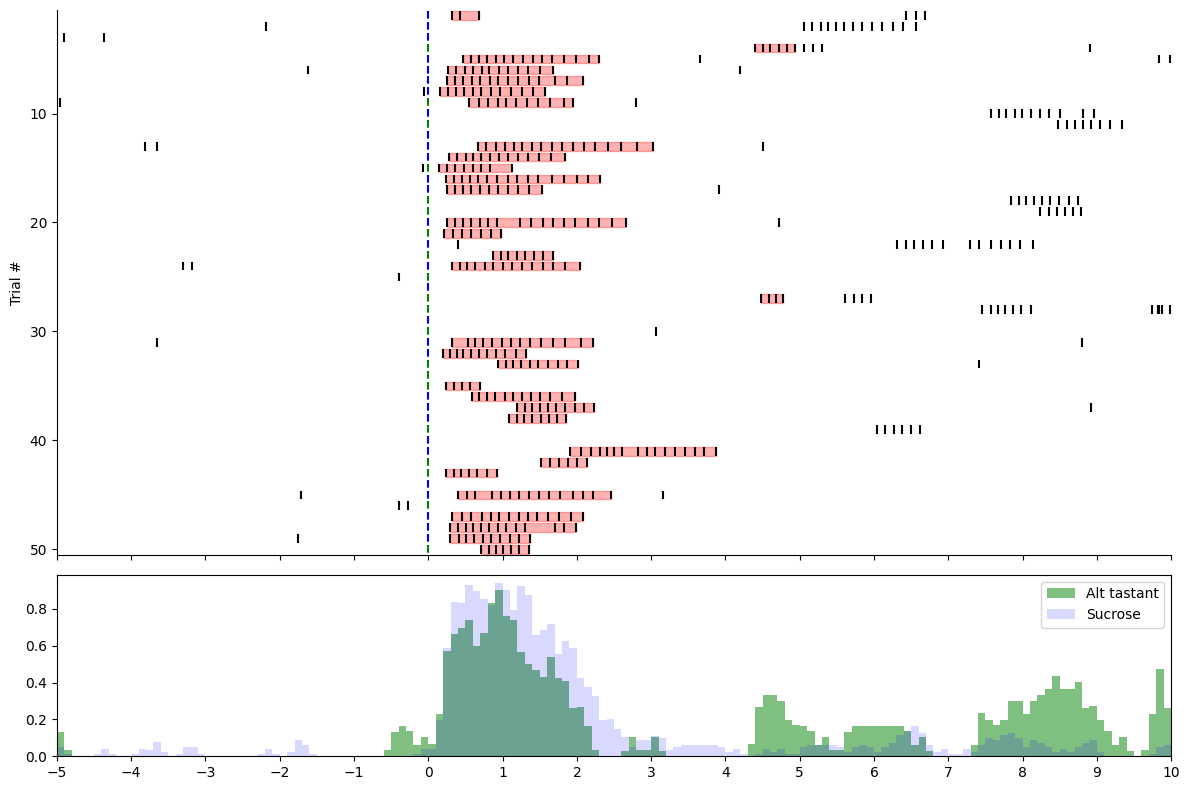

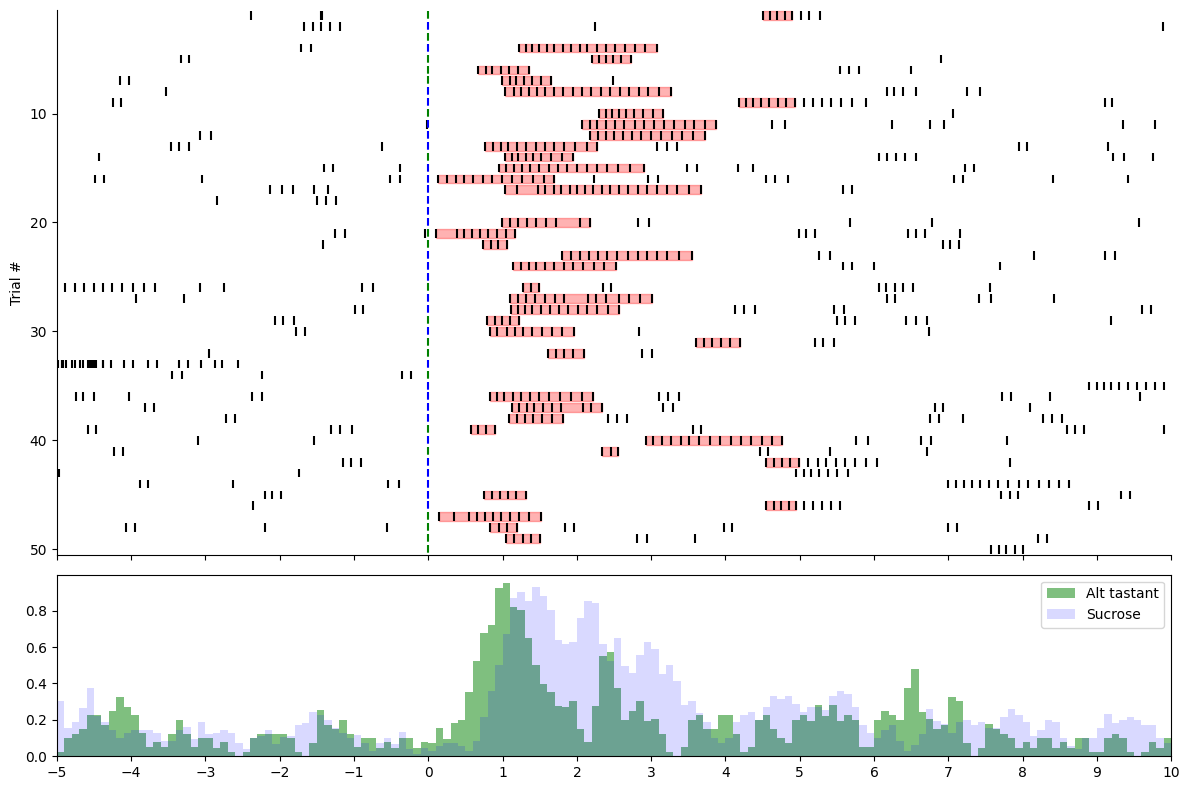

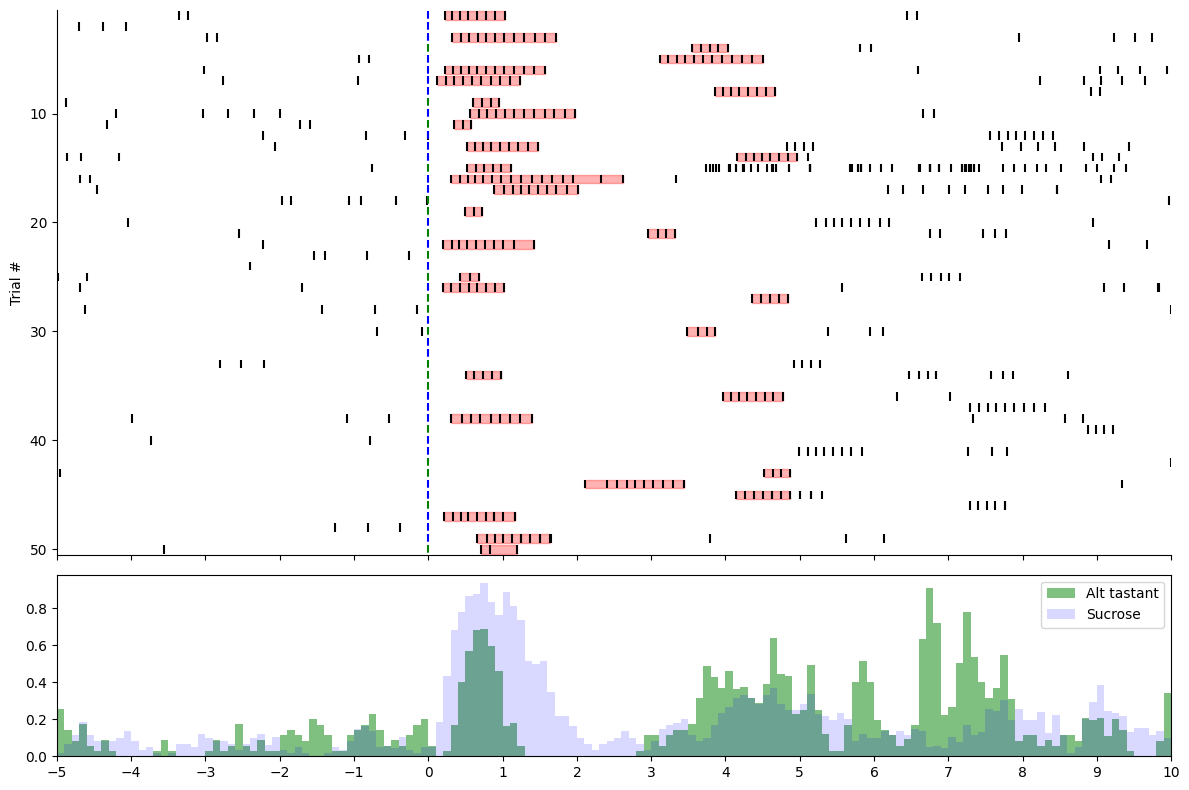

In [27]:
folder = '/Users/savani/Downloads/2p_data/fasted sucrose water'
for folderp in [f for f in os.listdir(folder) if not f.startswith('.')]:
    path = os.path.join(folder, folderp, 'suite2p', 'plane0', 'behaviordata.mat')
    fig, ax_raster, ax_psth = behav.plot_lick_raster_with_psth(
        mat_file = path,
        align_to = 'reward',
        pre_window = 5,
        post_window = 10,
        bin_size_psth = 0.1,
        smooth_psth = True,
        psth_smoothing_sigma = 0.65,
        xlabel = 'Time (s)',
        ylabel_raster = 'Trial #',
        ylabel_psth = 'Norm. Licks/sec',
        fps = 15,
        plot_bouts = True,
        multiple_tastant= True,
        filter_pre_licknum = 20,
        normalize_histo = True
    )
    plt.savefig(os.path.join(folder, folderp, 'suite2p', 'plane0', 'raster_rew.pdf'), dpi=300)

In [7]:
os.listdir(folder)

['glp6_FastedNoCues_L180_P815_600um-_-03092024-1421-084',
 'glp17_fasted30suc_L150P800_565um-032',
 '.DS_Store',
 'glp10_fasted_30suc_L170P800_560um_040724-005',
 'glp23_fasted_30suc_L155P800_575um-20250205-113-selected',
 'glp4_fasted_nocues_L180_p815_650um031124-003']

9.05 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d1/suite2p/plane0/behaviordata.mat
8.07 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d1/suite2p/plane0/behaviordata.mat
4.70 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d4/suite2p/plane0/behaviordata.mat
6.61 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d5/suite2p/plane0/behaviordata.mat
9.41 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fasted_d2/suite2p/plane0/behaviordata.mat
5.31 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp17_fasted_d3/suite2p/plane0/behaviordata.mat
5.52 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp23_fed_d3/suite2p/plane0/behaviordata.mat
6.63 MB	/Users/savani/Documents/PangLab/TwoPhotonAnalysis/src/data/fasted sequence/glp